<a href="https://colab.research.google.com/github/sakibchowdhury131/railcop/blob/main/DFT%2BCNN_aggregateDataTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import 
import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [1]:
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import math
import pandas as pd

In [4]:
#label1 csv files

csv_1 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/1.csv'
csv_2 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/2.csv'
csv_3 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/3.csv'
csv_4 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/4.csv'
csv_5 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/5.csv'
csv_6 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/6.csv'
csv_7 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/7.csv'
csv_8 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_1/8.csv'

In [5]:
#label0 csv files
csv_0 = '/content/drive/MyDrive/RailCop/New Files/Salim/Data/RailLine_Data/Version_6/2021_February_12/Data/Cleaned_Data/Aggregated_Data/Label_0/9.csv'

In [68]:
label1_1 = pd.read_csv(csv_1)['Sensor_3+Sensor_4+Sensor_5+Sensor_6+Sensor_7'].to_numpy()
label1_2 = pd.read_csv(csv_2)['Sensor_3+Sensor_5+Sensor_6+Sensor_7+Sensor_8'].to_numpy()
label1_3 = pd.read_csv(csv_3)['Sensor_3+Sensor_4+Sensor_5+Sensor_6+Sensor_7'].to_numpy()
label1_4 = pd.read_csv(csv_4)['Sensor_3+Sensor_4+Sensor_7+Sensor_8'].to_numpy()
label1_5 = pd.read_csv(csv_5)['Sensor_5+Sensor_7+Sensor_8'].to_numpy()
label1_6 = pd.read_csv(csv_6)['Sensor_3+Sensor_6+Sensor_7+Sensor_8'].to_numpy()
label1_7 = pd.read_csv(csv_7)['Sensor_3+Sensor_5+Sensor_6+Sensor_7'].to_numpy()
label1_8 = pd.read_csv(csv_8)['Sensor_3+Sensor_5+Sensor_6+Sensor_7'].to_numpy()
print(label1_1)

[ 38.  54.  35. ... 300. 750. 429.]


In [107]:
label0_1 = pd.read_csv(csv_0)['Sensor_5+Sensor_6+Sensor_7'].to_numpy()
X0 = label0_1
print(X0)

[59. 52. 49. ... 44. 44. 47.]


In [83]:
X1 = np.concatenate((label1_1, label1_2, label1_3, label1_4, label1_5, label1_6, label1_7, label1_8), axis=0)
len(X1)

22105

In [90]:
__frameSize = 1000

## label 0 framing

__numFrames1 = int(X1.shape[0] / __frameSize)
print(__numFrames1)
__frames1 = np.zeros((__numFrames1,__frameSize))
for i in range (0, __numFrames1):
  for j in range (0, __frameSize):
    __frames1[i][j] = X1[i*__frameSize+j]

22


In [91]:
__frames1

array([[ 38.,  54.,  35., ...,  46.,  46.,  45.],
       [ 42.,  48.,  47., ...,  46.,  43.,  46.],
       [ 78.,  49.,  32., ...,  51.,  48.,  56.],
       ...,
       [ 77.,  37., 124., ...,  40.,  40.,  50.],
       [ 41.,  51.,  42., ...,  31.,  53.,  44.],
       [ 52.,  43.,  47., ..., 200., 288., 383.]])

In [92]:
## Applying DFT
## finding Fourier Co-efficients Xn

def get_xn(samples,n):
    L  = len(samples)
    ks = np.arange(0,L,1)
    xn = np.sum(samples*np.exp((1j*2*np.pi*ks*n)/L))/L
    return(xn)

In [99]:
## Compute Fourier coefficients only up to the Nyquest Limit Xn, n=1,...,L/2 and 
## multiply the absolute value of the Fourier coefficients by 2, to account for 
## the symetry of the Fourier coefficients above the Nyquest Limit.


def get_xns(samples):
    mag = []
    L = len(samples)
    for n in range(int(L/2)): # Nyquest Limit
        mag.append(np.abs(get_xn(samples,n))*2)
    return(mag)
mag = get_xns(__frames1[13])

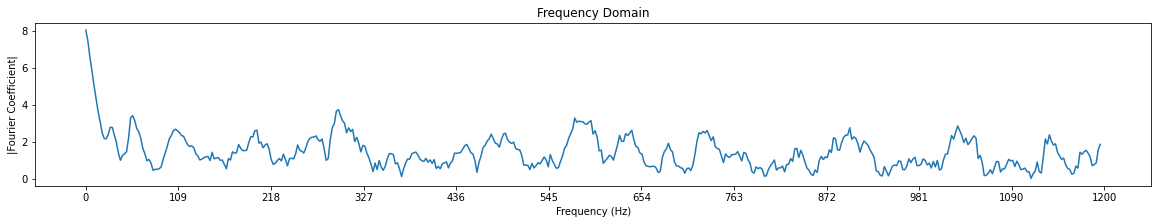

In [100]:
## Fourier Plot 

def get_Hz_scale_vec(ks,sample_rate,Npoints):
    freq_Hz = ks*sample_rate/Npoints
    freq_Hz  = [int(i) for i in freq_Hz ] 
    return(freq_Hz )
Nxlim = 12
sample_rate = int(9600/4)             
ks   = np.linspace(0,len(mag),Nxlim)
ksHz = get_Hz_scale_vec(ks,sample_rate,len(__frames1[0]))

plt.figure(figsize=(20,3))
plt.plot(mag[1:])
plt.xticks(ks,ksHz)
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Fourier Coefficient|")
plt.show()

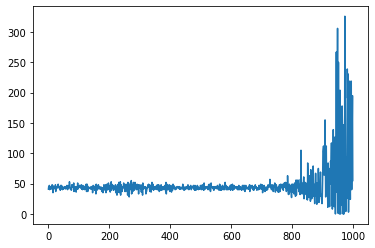

In [101]:
plt.plot (__frames1[13])

In [64]:
from scipy import signal

In [102]:
def spectrogram(sig_in):
    nperseg = 20 # default 256
    noverlap = nperseg // 4 # default: nperseg // 8
    fs = sample_rate# raw signal sample rate is 8000Hz
    window = 'triang'
    scaling = 'density' # {'density', 'spectrum'}
    detrend = 'linear' # {'linear', 'constant', False}
    eps = 1e-11
    f, t, Sxx = signal.spectrogram(sig_in, nperseg=nperseg, noverlap=noverlap,
                                   fs=fs, window=window,
                                   scaling=scaling, detrend=detrend)
    return f, t, np.log(Sxx + eps)

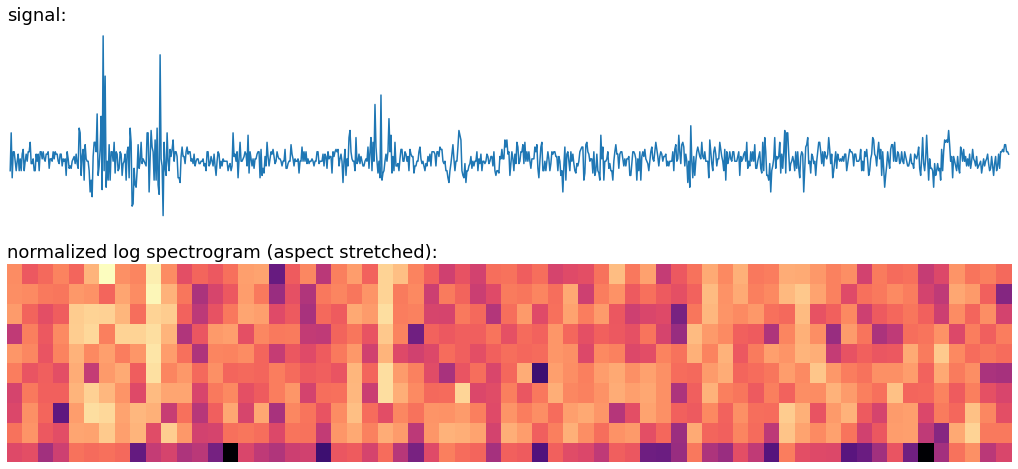

In [103]:
frame_index = 0
f, t, Sxx_out = spectrogram(__frames1[frame_index, :])

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(2, 1, 1)
ax.margins(x=0.003)
plt.plot(__frames1[frame_index, :])
plt.title('signal:', fontsize=18, loc='left')
plt.axis('off')

ax = fig.add_subplot(2, 1, 2)
cmap = plt.get_cmap('magma')
spec = plt.pcolormesh(t, f, Sxx_out, cmap=cmap)
plt.title('normalized log spectrogram (aspect stretched):',
          fontsize=18, loc='left')
plt.axis('off');

17322
17322
96.0
22105
22105
99.0


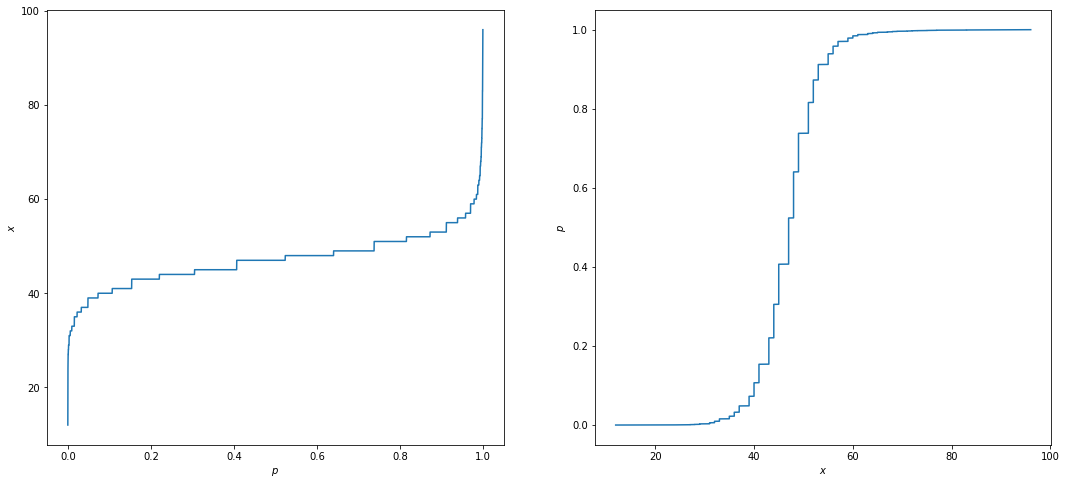

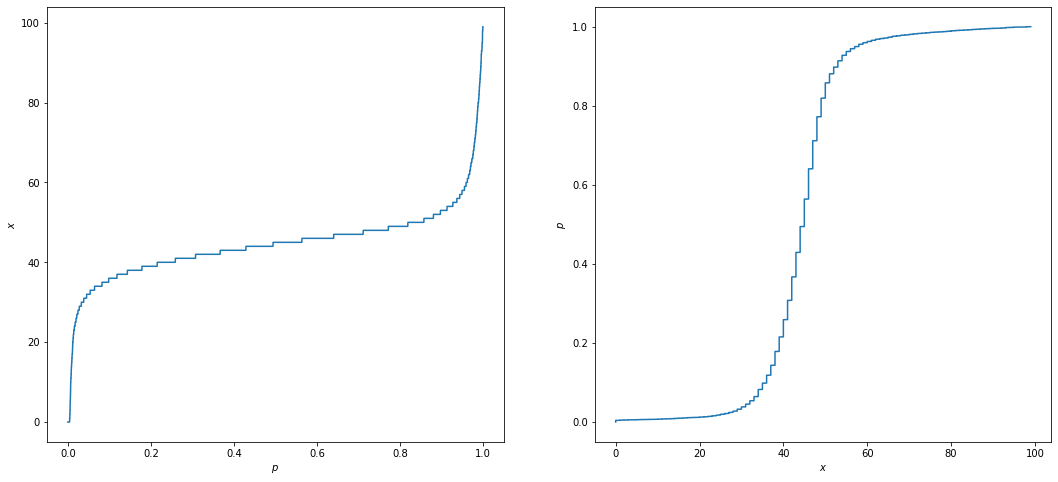

In [130]:
def CDF(data, limit):
  #computing CDF
  data_sorted = np.sort(data)
  print(len(data))
  print(len(data_sorted))
  if (limit>0):
    temp = []
    for i in range(0, len(data_sorted)):
      if (data_sorted[i]<limit):
        #print(data_sorted[i])
        temp.append(data_sorted[i])
    #print(count)
    temp = np.asarray(temp)
    #print(len(data_sorted))
    print(max(temp))
  
  p = 1. * np.arange(len(temp)) / (len(temp) - 1)
  # plot the sorted data:
  fig = plt.figure(figsize=(18, 8))
  ax1 = fig.add_subplot(121)
  ax1.plot(p, temp)
  ax1.set_xlabel('$p$')
  ax1.set_ylabel('$x$')

  ax2 = fig.add_subplot(122)
  ax2.plot(temp, p)
  ax2.set_xlabel('$x$')
  ax2.set_ylabel('$p$')


CDF(X0, 100)
CDF(X1, 100)